### Etavas para a criação do MVP 

#### Seleção das melhores ações para o modelo
- Calcular retorno médio, mediano e desvio padrão de todos;
- Encontrar o melhor setor;

#### Fazer um modelo de fatores para  seleção de ações e para o modelo
- Utilizar o google trends

#### Estratégia de hedge 
- Arbitragem de opções

<AxesSubplot:xlabel='Date'>

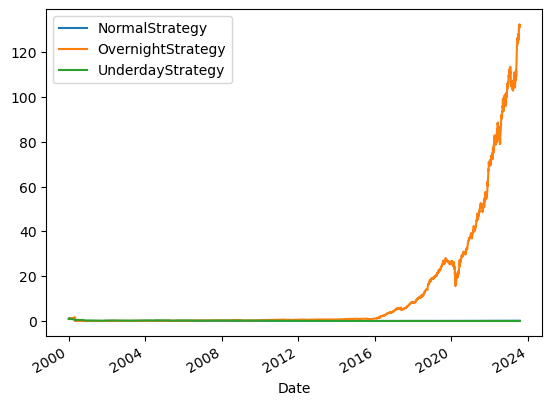

In [6]:
### Retorno ibovespa

import pandas as pd
import yfinance as yf
import requests
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# Defina o intervalo de datas para o histórico desejado

# Obtenha os dados do índice IBOVESPA

df = yf.Ticker("GGBR4.SA").history(start="2000-01-01")
df['Close_yesterday'] = df['Close'].shift(1)
df['OvernightStrategy'] =  df['Open'] / df['Close_yesterday'] - 1
df['NormalStrategy'] = df['Close'] / df['Close_yesterday'] - 1
df['UnderdayStrategy'] = df['Close'] / df['Open'] - 1
df.fillna(0,inplace=True)
df = df[1:-1]

strategies = df[['NormalStrategy','OvernightStrategy','UnderdayStrategy']]
strategies = (strategies+1).cumprod()

strategies.plot()

In [7]:
# how to get a list of all stocks?
import csv

#opening the csv file
with open("tickers.csv", mode="r", encoding="utf-8") as file:
    
    #reading the csv file
    csvFile = csv.reader(file)

    #displayng the content of the csv file
    for i, line in enumerate(csvFile):
        print(i, line[2])

0 RRRP3.SA
1 TTEN3.SA
2 ABCB4.SA
3 AERI3.SA
4 AESB3.SA
5 ALSO3.SA
6 AALR3.SA
7 ALPA4.SA
8 ALUP11.SA
9 ABEV3.SA
10 AMBP3.SA
11 ANIM3.SA
12 ARZZ3.SA
13 ARML3.SA
14 ASAI3.SA
15 AURE3.SA
16 AZUL4.SA
17 B3SA3.SA
18 BPAN4.SA
19 BRSR6.SA
20 BBSE3.SA
21 BMOB3.SA
22 BLAU3.SA
23 BOAS3.SA
24 BRPR3.SA
25 BBDC3.SA
26 BBDC4.SA
27 BRAP4.SA
28 BBAS3.SA
29 AGRO3.SA
30 BRKM5.SA
31 BRFS3.SA
32 BPAC11.SA
33 CXSE3.SA
34 CAML3.SA
35 CRFB3.SA
36 CBAV3.SA
37 CCRO3.SA
38 CEAB3.SA
39 CMIG3.SA
40 CMIG4.SA
41 CIEL3.SA
42 CLSA3.SA
43 COGN3.SA
44 CSMG3.SA
45 CPLE6.SA
46 CSAN3.SA
47 CPFE3.SA
48 CMIN3.SA
49 CURY3.SA
50 CVCB3.SA
51 CYRE3.SA
52 DASA3.SA
53 DXCO3.SA
54 PNVL3.SA
55 DIRR3.SA
56 ECOR3.SA
57 ELET3.SA
58 ELET6.SA
59 EMBR3.SA
60 ENAT3.SA
61 ENGI11.SA
62 ENEV3.SA
63 EGIE3.SA
64 EQTL3.SA
65 ESPA3.SA
66 EVEN3.SA
67 EZTC3.SA
68 FHER3.SA
69 FESA4.SA
70 FLRY3.SA
71 GFSA3.SA
72 GGBR4.SA
73 GOAU4.SA
74 GOLL4.SA
75 GGPS3.SA
76 GRND3.SA
77 GMAT3.SA
78 NTCO3.SA
79 SBFG3.SA
80 SOMA3.SA
81 GUAR3.SA
82 HAPV3.SA
83 HBSA3.SA

0 PETR4.SA
1 VALE3.SA
2 SUZB3.SA
3 GGBR4.SA


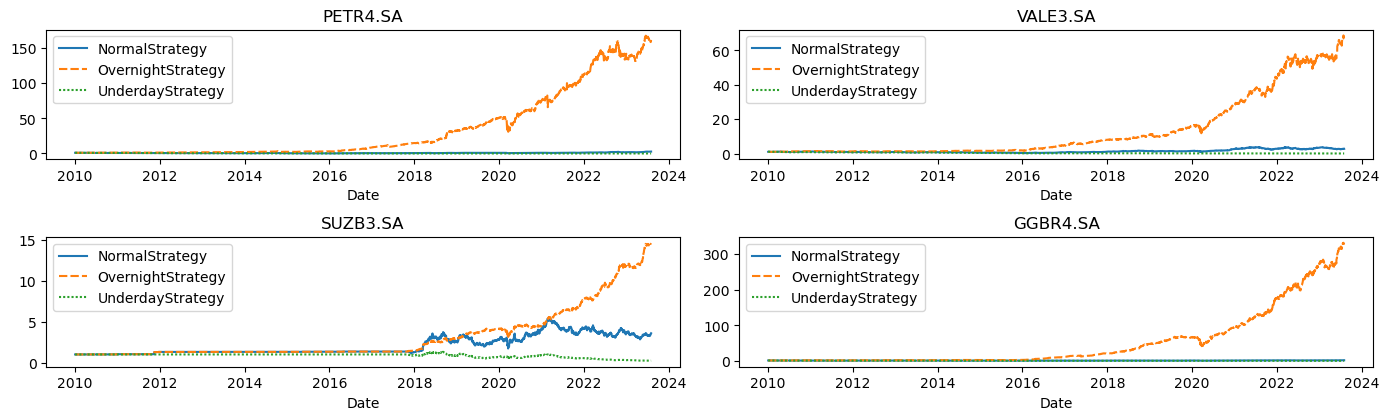

In [8]:
tickers_acoes = ["PETR4.SA", "VALE3.SA", "SUZB3.SA", "GGBR4.SA"]

acoes_dataframes = {}

#Tamanho final da imagem
plt.subplots(figsize=(14, 8))
for i, acao in enumerate(tickers_acoes):
    df = yf.Ticker(acao).history(start="2010-01-01")
    df['Close_yesterday'] = df['Close'].shift(1)
    df['OvernightStrategy'] =  df['Open'] / df['Close_yesterday'] - 1
    df['NormalStrategy'] = df['Close'] / df['Close_yesterday'] - 1
    df['UnderdayStrategy'] = df['Close'] / df['Open'] - 1
    df.fillna(0,inplace=True)
    df = df[1:-1]

    strategies = df[['NormalStrategy','OvernightStrategy','UnderdayStrategy']]
    strategies = (strategies+1).cumprod()
    plt.subplot(len(tickers_acoes),2, i+1)
    plt.title(acao)
    sns.lineplot(strategies)
    print(i, acao)
    acoes_dataframes[acao] = strategies
# Espaço entre os gráficos na imagem gerada    
plt.tight_layout(pad=1.0)
plt.show()

In [40]:
acoes_dataframes["GGBR4.SA"]["OvernightStrategy"].mean()

# Calcula "sharpe ratio" para as ações na estratégia overnight (ainda falta adicionar o cdi)

for acao, dataframe in acoes_dataframes.items():
    retorno = dataframe['OvernightStrategy'][-1]
    desvio_padrao = dataframe['OvernightStrategy'].std()
    print(f"Ação:{acao}, Retorno:{retorno:.2f}, Volatilidade:{desvio_padrao:.2f}, Razão: {retorno/desvio_padrao:.2f}")

Ação:PETR4.SA, Retorno:161.15, Volatilidade:46.85, Razão: 3.44
Ação:VALE3.SA, Retorno:67.93, Volatilidade:18.00, Razão: 3.77
Ação:SUZB3.SA, Retorno:14.58, Volatilidade:3.18, Razão: 4.59
Ação:GGBR4.SA, Retorno:330.34, Volatilidade:79.52, Razão: 4.15


In [2]:

# URL da API do Banco Central para obter a série histórica do CDI
url = "https://api.bcb.gov.br/dados/serie/bcdata.sgs.11/dados?formato=json&dataInicial=2009-01-01"

# Faça a requisição à API do Banco Central
response = requests.get(url)

# Verifique se a requisição foi bem-sucedida
if response.status_code == 200:
    # Obtenha os dados do CDI em formato JSON
    dados_cdi = response.json()

    # Crie uma lista para as datas e outra para os valores do CDI
    datas = []
    valores_cdi = []

    # Extraia as datas e valores do CDI dos dados
    for dado in dados_cdi:
        data = dado["data"]
        valor = float(dado["valor"])
        datas.append(data)
        valores_cdi.append(valor)

    # Crie o DataFrame CDI
    CDI = pd.DataFrame(valores_cdi, index=pd.to_datetime(datas), columns=["CDI"])

else:
    print("Falha ao obter a série histórica do CDI.")



df.index = pd.to_datetime(df.index).date
CDI.index = pd.to_datetime(CDI.index).date

df_cdi = pd.merge(df, CDI,left_index = True, right_index=True)

C:\Users\diogo\AppData\Local\Temp\ipykernel_1876\3556112372.py:24: UserWarning: Parsing '13/06/1986' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  CDI = pd.DataFrame(valores_cdi, index=pd.to_datetime(datas), columns=["CDI"])
C:\Users\diogo\AppData\Local\Temp\ipykernel_1876\3556112372.py:24: UserWarning: Parsing '16/06/1986' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  CDI = pd.DataFrame(valores_cdi, index=pd.to_datetime(datas), columns=["CDI"])
C:\Users\diogo\AppData\Local\Temp\ipykernel_1876\3556112372.py:24: UserWarning: Parsing '17/06/1986' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  CDI = pd.DataFrame(valores_cdi, index=pd.to_datetime(datas), columns=["CDI"])
C:\Users\diogo\AppData\Local\Temp\ipykernel_1876\3556112372.py:24: UserWarning: Parsing '18/06/1986' in DD/MM/YYYY format. Provide format or specify infer_datet

In [3]:
df_cdi

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Close_yesterday,OvernightStrategy,NormalStrategy,UnderdayStrategy,CDI
2009-04-20,44.790001,44.900002,44.070000,44.419998,265800,0,0,45.849998,-0.023119,-0.031189,-0.008261,0.041993
2009-04-22,44.610001,45.240002,44.509998,44.990002,234800,0,0,44.419998,0.004277,0.012832,0.008518,0.041993
2009-04-23,45.189999,45.900002,44.860001,45.900002,305900,0,0,44.990002,0.004445,0.020227,0.015712,0.041993
2009-04-24,46.169998,46.849998,46.099998,46.689999,325600,0,0,45.900002,0.005882,0.017211,0.011263,0.041993
2009-04-27,45.900002,46.400002,45.500000,45.900002,334500,0,0,46.689999,-0.016920,-0.016920,0.000000,0.041993
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-21,114.449997,116.650002,114.400002,116.400002,8651985,0,0,114.339996,0.000962,0.018016,0.017038,0.050788
2023-07-24,116.470001,117.959999,116.269997,117.570000,6794197,0,0,116.400002,0.000601,0.010052,0.009444,0.050788
2023-07-25,118.970001,119.169998,117.980003,117.980003,5681391,0,0,117.570000,0.011908,0.003487,-0.008321,0.050788
2023-07-26,117.849998,118.889999,117.550003,118.739998,7270167,0,0,117.980003,-0.001102,0.006442,0.007552,0.050788
